In [236]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix , classification_report 
import seaborn as sns

In [237]:
train_emotion_features = np.load(r'FeatureFiles/ImageEmotion_train_Idea4_beta=0_featuresdata.npy')
test_emotion_features = np.load(r'FeatureFiles/ImageEmotion_test_Idea4_beta=0_featuresdata.npy')
train_labels = np.load(r'FeatureFiles/train_labels.npy')
test_labels = np.load(r'FeatureFiles/test_labels.npy')

In [238]:
train_emotion_features.shape

(18559, 3968)

In [239]:
train_labels.shape

(18559, 8)

In [240]:
train_features_df = pd.DataFrame(train_emotion_features)

train_features_df

,0,1,2,3,4,5,6,7,8,9,...,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967
0,0.000131,0.000650,0.000559,0.002996,0.001354,0.000207,0.000140,7.373997e-05,0.000000,0.003339,...,0.000000,0.644007,0.492688,0.536332,0.164228,0.000000,0.285024,0.023714,0.263542,0.110953
1,0.000359,0.000813,0.000187,0.001898,0.001103,0.000440,0.000113,1.875461e-06,0.000000,0.014766,...,0.000502,0.292974,1.385209,1.078859,0.099730,0.328670,0.100978,0.657828,0.355692,0.014903
2,0.000132,0.000520,0.000831,0.003826,0.000406,0.000090,0.000197,6.487292e-07,0.000019,0.003570,...,0.068098,1.958494,0.255637,0.012984,0.671757,0.067285,1.094809,0.008287,0.089689,0.162944
3,0.000279,0.000335,0.000989,0.001342,0.000355,0.000322,0.000066,4.127752e-05,0.000008,0.019635,...,0.334862,0.104110,0.000000,0.830077,2.180499,1.285164,1.039261,0.196039,0.049767,0.303676
4,0.000188,0.000420,0.000540,0.002373,0.000885,0.000582,0.000268,3.219979e-05,0.000004,0.021725,...,1.252645,0.056618,0.102172,0.221244,0.024396,1.360688,0.264512,0.222477,0.179949,0.162017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18554,0.000251,0.000210,0.000602,0.001099,0.000726,0.000345,0.000090,6.223613e-05,0.000007,0.006568,...,0.086585,0.098487,0.047227,0.184302,1.905549,0.021016,0.879156,0.821740,1.660990,0.448015
18555,0.000192,0.000626,0.000763,0.002589,0.000506,0.000434,0.000198,4.518421e-05,0.000005,0.012137,...,0.006498,0.860977,0.316062,0.090322,0.000000,2.316531,0.178942,0.268416,0.261073,1.088868
18556,0.000184,0.000729,0.001093,0.003856,0.000770,0.000428,0.000241,5.803438e-05,0.000003,0.023117,...,0.034420,0.000985,0.031427,0.043343,0.000000,0.020558,0.000000,0.000000,0.001260,0.000000
18557,0.000282,0.000977,0.000504,0.004395,0.000325,0.000377,0.000096,1.295590e-05,0.000008,0.012172,...,0.705324,0.505364,0.603676,0.122435,0.552808,0.006525,0.000000,0.171945,0.276896,0.247188


In [241]:
test_features_df = pd.DataFrame(test_emotion_features)

test_features_df

,0,1,2,3,4,5,6,7,8,9,...,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967
0,0.000153,0.001146,0.001158,0.000942,0.000395,0.000254,0.000181,0.000019,1.615812e-05,0.013323,...,0.564857,0.165450,0.192193,0.627179,1.301700,1.113334,1.007130,0.687294,0.444163,0.414094
1,0.000169,0.001116,0.001860,0.000386,0.000432,0.000415,0.000191,0.000068,1.312626e-05,0.018170,...,0.612747,0.867309,1.084052,0.136451,0.064687,0.014080,1.204998,0.277467,0.328152,0.000000
2,0.000502,0.000623,0.000450,0.000207,0.000242,0.000440,0.000215,0.000000,1.140752e-05,0.013813,...,1.057227,0.317559,0.001087,0.046471,0.237268,1.552068,0.112959,0.054535,0.048644,0.983532
3,0.000364,0.000354,0.000742,0.001724,0.000387,0.000263,0.000272,0.000025,4.075807e-06,0.011274,...,0.508036,0.472686,0.210256,0.101093,0.004680,0.243648,0.014032,0.582522,0.326725,0.151330
4,0.000102,0.000906,0.001260,0.001866,0.000742,0.000497,0.000320,0.000084,1.529070e-05,0.008131,...,3.050762,0.427388,0.067142,0.000000,0.008365,0.131781,0.130085,0.235205,0.308521,0.607889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.000148,0.000452,0.001053,0.001852,0.000957,0.000542,0.000108,0.000063,7.449320e-06,0.023990,...,0.422703,0.020323,0.008263,0.149412,0.000000,0.433187,1.425967,0.000000,0.486303,0.377532
3273,0.000254,0.000651,0.001082,0.004237,0.001288,0.000289,0.000109,0.000010,9.154647e-07,0.008579,...,0.028560,0.819507,0.697795,0.342722,0.000000,0.025101,0.000000,0.011313,0.649980,0.807932
3274,0.000114,0.001144,0.001762,0.000520,0.000634,0.000401,0.000231,0.000063,3.330097e-05,0.012200,...,0.047618,0.000000,0.003724,0.032909,0.000000,0.285568,0.067251,0.036604,0.017208,0.207059
3275,0.000127,0.000946,0.002098,0.003313,0.000649,0.000322,0.000246,0.000009,2.472024e-05,0.018913,...,0.004503,1.028785,0.000000,0.581423,0.001706,0.000000,0.000000,0.340501,0.833679,0.000000


In [242]:
multilabel_train = []
for lbl in train_labels:
    multilabel_train.append(np.argmax(lbl))

multilabel_train = np.array(multilabel_train)
multilabel_train

array([3, 0, 3, ..., 2, 2, 5])

In [243]:
multilabel_test = []
for lbl in test_labels:
    multilabel_test.append(np.argmax(lbl))
    
multilabel_test = np.array(multilabel_test)
multilabel_test

array([0, 0, 0, ..., 7, 7, 7])

In [244]:
svc = SVC(kernel='rbf', C=5.0)
svc.fit(train_emotion_features, multilabel_train)
test_preds = svc.predict(test_emotion_features)

In [245]:
test_preds

array([5, 0, 0, ..., 1, 7, 7])

In [246]:
def classificn_report(y_test, y_preds):
    
    output_details = classification_report(y_test, y_preds, output_dict=True)
    print(classification_report(y_test, y_preds))
    return output_details

def generate_cm_data(y_test, y_preds):
    NUM_CLASSES = 8
    CLASS_LABELS  = ['Amusement', 'Anger', 'Awe', 'Contentment', 'Disgust', 'Excitement', 'Fear', 'Sadness']
    
    cm_data = confusion_matrix(y_test , y_preds)
    cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
    
    all_mod_rows = []
    for i in range(NUM_CLASSES):
        row = cm.iloc[i]
        row_total = 0
        for k in range(NUM_CLASSES):
            row_total += row[k]
        mod_row = []
        for j in range(NUM_CLASSES):
            mod_row.append(round(row[j]/row_total, 2))
        all_mod_rows.append(np.array(mod_row))
    
    return pd.DataFrame(all_mod_rows, columns=CLASS_LABELS, index=CLASS_LABELS)

In [247]:
output_details = classificn_report(multilabel_test, test_preds)

print('Accuracy', output_details['accuracy'])
# 0 --> Amusement
# 1 --> Anger
# 2 --> Awe
# 3 --> Contentment
# 4 --> Disgust
# 5 --> Excitement
# 6 --> Fear
# 7 --> Sadness

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       708
           1       0.45      0.39      0.42       175
           2       0.71      0.70      0.70       430
           3       0.69      0.67      0.68       772
           4       0.66      0.71      0.68       238
           5       0.63      0.64      0.63       405
           6       0.45      0.33      0.38       151
           7       0.60      0.66      0.63       398

    accuracy                           0.67      3277
   macro avg       0.62      0.61      0.61      3277
weighted avg       0.67      0.67      0.67      3277

Accuracy 0.6698199572779981


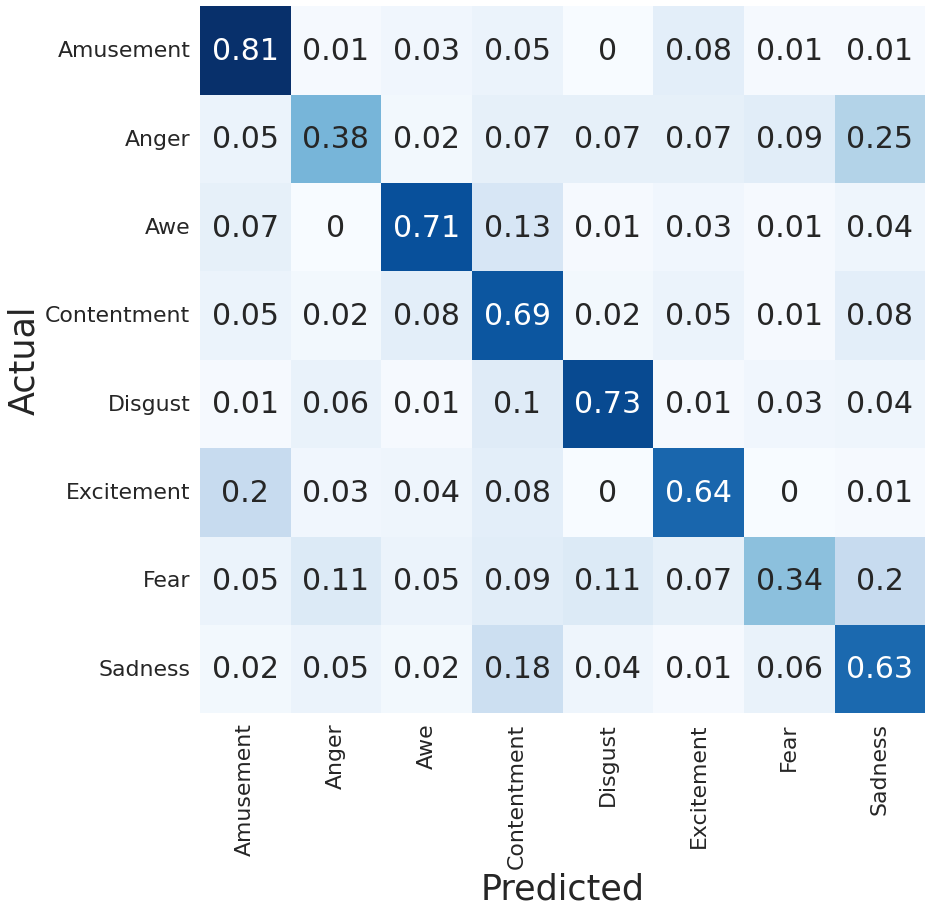

In [79]:
#plotting confusion matrix (in terms of recall scores)
cm = generate_cm_data(multilabel_test, test_preds)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (13,13))
sns.set(font_scale=2)
plt.xticks(rotation=45)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 30}, fmt='g')
ax.xaxis.label.set_fontsize(35)
ax.yaxis.label.set_fontsize(35)

#plt.savefig("r101 d169.pdf",format="pdf",bbox_inches="tight")

In [97]:
avg_scores = []

In [104]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
svc = SVC(kernel='linear', C=1.0)
scores = []

for train_indices, test_indices in skf.split(features_data, labels):
    train_data, train_labels = features_data[train_indices], labels[train_indices]
    test_data, test_labels = features_data[test_indices], labels[test_indices]
    svc.fit(train_data, train_labels)
    test_preds = svc.predict(test_data)
    scores.append(accuracy_score(test_labels, test_preds))

avg_score = (scores[0]+scores[1]+scores[2]+scores[3]+scores[4])/5 * 100
avg_score = round(avg_score,0)

avg_scores.append(avg_score)

#final_score = statistics.mode(avg_scores)
#final_score
avg_score

63.0

In [90]:
scores

[0.18484848484848485,
 0.20909090909090908,
 0.19393939393939394,
 0.19090909090909092,
 0.22121212121212122]

In [94]:
avg_scores

[20.0, 19.0, 20.0, 18.0, 20.0, 20.0, 18.0, 20.0, 21.0]